In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.dropna(inplace = True)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [5]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [6]:
X_in = data_in.iloc[:,1:] # We need the x variable, all the other column
y_in = data_in.iloc[:,:1] # We need the x variable, only one column
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,:1]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,:1]

In [7]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [8]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [9]:
import matplotlib.pyplot as plt

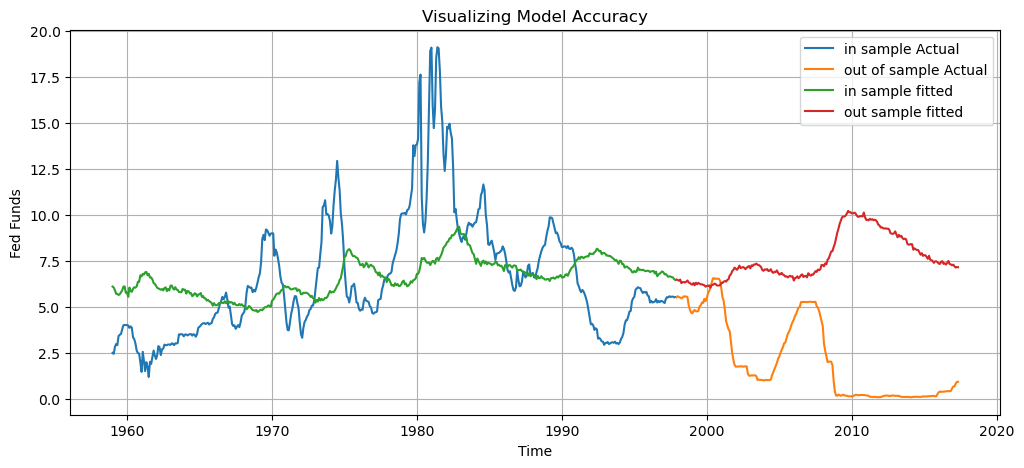

In [10]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["in sample Actual", "out of sample Actual", "in sample fitted", "out sample fitted"])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [13]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566727


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
max_degrees = 3

Degrees =  1


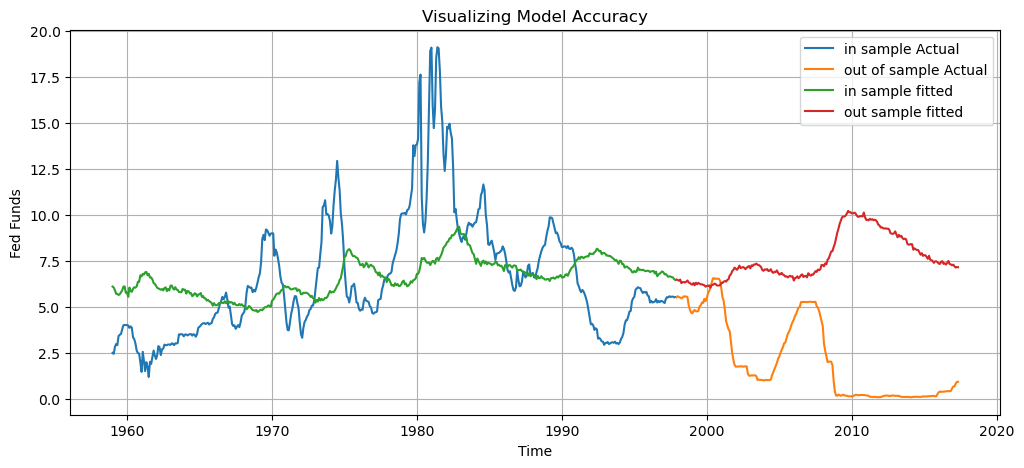

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835667884
-----------------------------------------------------
-----------------------------------------------------
Degrees =  2


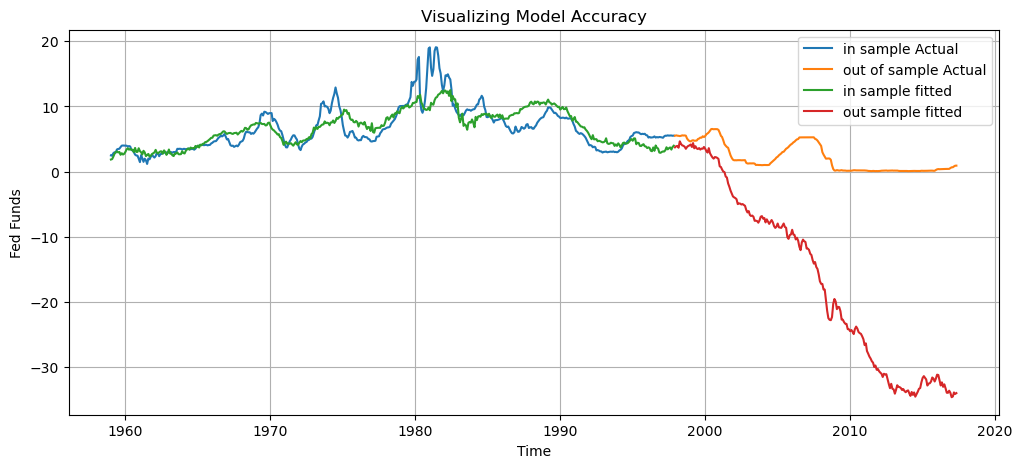

Insample MSE :  3.863477139276068
Outsample MSE :  481.4465099288752
-----------------------------------------------------
-----------------------------------------------------
Degrees =  3


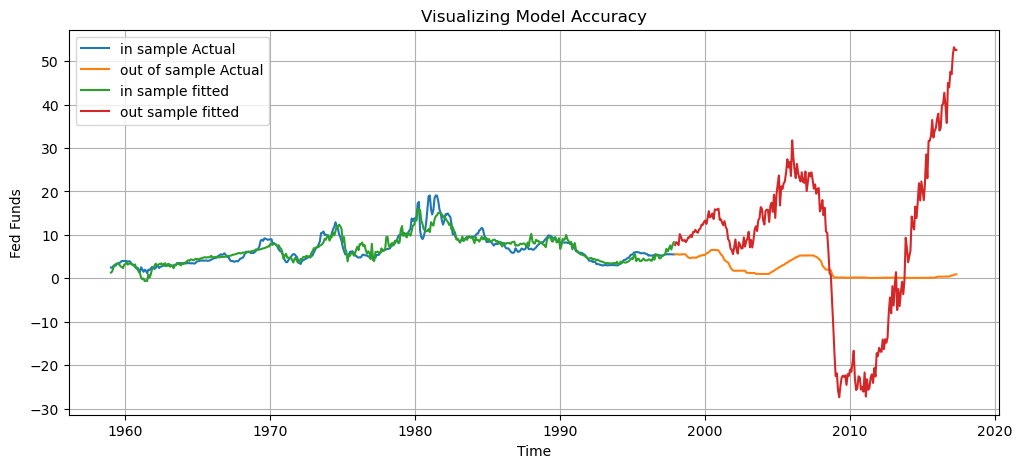

Insample MSE :  1.8723636267309247
Outsample MSE :  371.7678694269212
-----------------------------------------------------
-----------------------------------------------------


In [16]:
for degrees in range(1, 1+max_degrees):
    print("Degrees = ", degrees)
    poly = PolynomialFeatures(degree = degrees) # transform all variables into all possible items with degree of 2
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)

    model1 = sm.OLS(y_in, X_in_poly).fit()

    plt.figure(figsize = (12,5))

    ###
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["in sample Actual", "out of sample Actual", "in sample fitted", "out sample fitted"])
    plt.grid()
    plt.show()

    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    print("-----------------------------------------------------")
    print("-----------------------------------------------------")

# 7.) State your observations :

- As the degree goes up, the variance of in-sample will decrease, while the out-sample increases.
- The model 3 is obviously overfitted, which works great in sample, but works terrible out of sample.
- the MSE of degree 3 model is slightly less than degree 2 model, which is weird.